<a href="https://colab.research.google.com/github/vjmiyagi/DS-Unit-2-Applied-Modeling/blob/master/POWERBALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Powerball


In [119]:
# Imports

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
! pip install category_encoders
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error



In [120]:
url = 'https://raw.githubusercontent.com/vjmiyagi/DS-Unit-2-Applied-Modeling/master/pb2.csv'

df = pd.read_csv(url)

print(df.shape)

(493, 49)


# Regression problem 

Going with ticketswin (winning tickets for any prize)


In [121]:
df.head()


,year,month,day,b1,b2,b3,b4,b5,pb,pp,tickets,pbpurchase,pppurchase,jackpot,profitloss_jp,winners,rollovers,value,wb5pb_jp,wb5_1000000,wb4pb_50000,wb4_100,wb3pb_100,wb3_7,wb2pb_7,wb1pb_4,wb0pb_4,wb5pp_2000000,wb4pbpp_150000,wb4pp_300,wb3pbpp_300,wb3pp_21,wb2pbpp_21,wb1pbpp_12,wb0pbpp_12,totalwon,ticketswin,wb1prior,wb2prior,wb3prior,wb4prior,wb5prior,wb1win,wb2win,wb3win,wb4win,wb5win,pbprevdraw,pbprevwin
0,2020,6,20,67,10,31,63,41,5,3,10374959,20749918,2678995,25600000,49579522,0,3,-1.59,0,1,10,204,453,11575,10626,86054,214749,0,1,45,149,3788,3660,29828,74142,4536567,435285,37,38,31,42,43,1,3,2,0,2,15,2
1,2020,6,17,10,7,68,64,63,10,3,9243787,18487574,2357707,22000000,30687176,0,2,-1.60,0,1,5,145,424,10170,9586,78336,184812,0,1,52,127,3469,3495,27703,63511,3942296,381837,37,35,44,47,41,3,1,4,1,0,20,2
2,2020,6,13,65,12,2,32,50,5,3,10006606,20013212,2567607,20000000,13784191,0,1,-1.61,0,0,6,157,506,12148,11191,87093,201850,1,1,70,168,4198,3841,29584,69176,5260784,419990,28,42,33,52,38,2,5,3,5,0,14,2
3,2020,6,10,33,10,41,54,52,18,5,9588292,19176584,2394843,22000000,-3535844,1,0,-1.60,1,0,6,143,485,11432,9625,77172,184121,0,2,45,144,3668,3280,25680,61761,25107271,377565,36,36,42,38,34,3,3,2,4,6,21,1
4,2020,6,6,68,38,69,1,17,18,2,10675612,21351224,2683881,20000000,-95453540,0,1,-1.61,0,0,5,183,471,12367,10504,84414,204948,1,3,82,179,4100,3555,28303,68727,5486360,417842,43,31,46,36,37,4,2,0,3,5,20,1


In [122]:
df['WinNoPP'] = df['wb5pb_jp'] + \
                df['wb5_1000000'] + \
                df['wb4pb_50000'] + \
                df['wb4_100'] + \
                df['wb3pb_100'] + \
                df['wb3_7'] + \
                df['wb2pb_7'] + \
                df['wb1pb_4'] + \
                df['wb0pb_4']    

df['WinNoPP']

0      323672
1      283479
2      312951
3      282985
4      312892
        ...  
488    408870
489    347475
490    360627
491    343186
492    318229
Name: WinNoPP, Length: 493, dtype: int64

In [123]:
df['WinPP'] = df['wb5pp_2000000'] + \
              df['wb4pbpp_150000'] + \
              df['wb4pp_300'] + \
              df['wb3pbpp_300'] + \
              df['wb3pp_21'] + \
              df['wb2pbpp_21'] + \
              df['wb1pbpp_12'] + \
              df['wb0pbpp_12']
df['WinPP']

0      111613
1       98358
2      107039
3       94580
4      104950
        ...  
488    107297
489     87629
490     92359
491     87714
492     81655
Name: WinPP, Length: 493, dtype: int64

In [124]:
df.head()

,year,month,day,b1,b2,b3,b4,b5,pb,pp,tickets,pbpurchase,pppurchase,jackpot,profitloss_jp,winners,rollovers,value,wb5pb_jp,wb5_1000000,wb4pb_50000,wb4_100,wb3pb_100,wb3_7,wb2pb_7,wb1pb_4,wb0pb_4,wb5pp_2000000,wb4pbpp_150000,wb4pp_300,wb3pbpp_300,wb3pp_21,wb2pbpp_21,wb1pbpp_12,wb0pbpp_12,totalwon,ticketswin,wb1prior,wb2prior,wb3prior,wb4prior,wb5prior,wb1win,wb2win,wb3win,wb4win,wb5win,pbprevdraw,pbprevwin,WinNoPP,WinPP
0,2020,6,20,67,10,31,63,41,5,3,10374959,20749918,2678995,25600000,49579522,0,3,-1.59,0,1,10,204,453,11575,10626,86054,214749,0,1,45,149,3788,3660,29828,74142,4536567,435285,37,38,31,42,43,1,3,2,0,2,15,2,323672,111613
1,2020,6,17,10,7,68,64,63,10,3,9243787,18487574,2357707,22000000,30687176,0,2,-1.60,0,1,5,145,424,10170,9586,78336,184812,0,1,52,127,3469,3495,27703,63511,3942296,381837,37,35,44,47,41,3,1,4,1,0,20,2,283479,98358
2,2020,6,13,65,12,2,32,50,5,3,10006606,20013212,2567607,20000000,13784191,0,1,-1.61,0,0,6,157,506,12148,11191,87093,201850,1,1,70,168,4198,3841,29584,69176,5260784,419990,28,42,33,52,38,2,5,3,5,0,14,2,312951,107039
3,2020,6,10,33,10,41,54,52,18,5,9588292,19176584,2394843,22000000,-3535844,1,0,-1.60,1,0,6,143,485,11432,9625,77172,184121,0,2,45,144,3668,3280,25680,61761,25107271,377565,36,36,42,38,34,3,3,2,4,6,21,1,282985,94580
4,2020,6,6,68,38,69,1,17,18,2,10675612,21351224,2683881,20000000,-95453540,0,1,-1.61,0,0,5,183,471,12367,10504,84414,204948,1,3,82,179,4100,3555,28303,68727,5486360,417842,43,31,46,36,37,4,2,0,3,5,20,1,312892,104950


In [125]:
df.columns

Index(['year', 'month', 'day', 'b1', 'b2', 'b3', 'b4', 'b5', 'pb', 'pp',
       'tickets', 'pbpurchase', 'pppurchase', 'jackpot', 'profitloss_jp',
       'winners', 'rollovers', 'value', 'wb5pb_jp', 'wb5_1000000',
       'wb4pb_50000', 'wb4_100', 'wb3pb_100', 'wb3_7', 'wb2pb_7', 'wb1pb_4',
       'wb0pb_4', 'wb5pp_2000000', 'wb4pbpp_150000', 'wb4pp_300',
       'wb3pbpp_300', 'wb3pp_21', 'wb2pbpp_21', 'wb1pbpp_12', 'wb0pbpp_12',
       'totalwon', 'ticketswin', 'wb1prior', 'wb2prior', 'wb3prior',
       'wb4prior', 'wb5prior', 'wb1win', 'wb2win', 'wb3win', 'wb4win',
       'wb5win', 'pbprevdraw', 'pbprevwin', 'WinNoPP', 'WinPP'],
      dtype='object')

In [126]:
target = 'ticketswin'

features = ['tickets']

In [127]:
guess = df[target].mean()
guess

884867.3387423935

In [128]:
errors = guess - df[target]
errors

0      449582.338742
1      503030.338742
2      464877.338742
3      507302.338742
4      467025.338742
           ...      
488    368700.338742
489    449763.338742
490    431881.338742
491    453967.338742
492    484983.338742
Name: ticketswin, Length: 493, dtype: float64

In [129]:
mae = errors.abs().mean()

In [130]:
mae

494261.3773354357

In [131]:
print(f'If we just guessed the mean of winning tickets, or {guess:,.0f},')
print(f'we would be off by {mae:,.0f} on average.')
print(f'This is using data with maximimum  winning tickets of {max(df[target]):,.0f}')
print(f'and minimum number of winning tickets of {min(df[target]):,.0f}')

If we just guessed the mean of winning tickets, or 884,867,
we would be off by 494,261 on average.
This is using data with maximimum  winning tickets of 26,110,646
and minimum number of winning tickets of 294,091


In [132]:
import plotly.express as px
px.scatter(df, x='tickets', y = target, trendline='ols')

In [133]:
print('')

In [134]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['tickets']
target = 'ticketswin'

X_train = df[features]
y_train = df[target]

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
guess = 440321200

X_test = [[guess]]
y_pred = model.predict(X_test)
y_pred

array([18096627.55115077])

In [136]:
y_test = [18315360]
print(y_test, y_pred)

[18315360] [18096627.55115077]


In [137]:
from sklearn.metrics import mean_absolute_error as mae

mae = mae(y_test, y_pred)
print(f'Model error is: {mae:.0f}')

Model error is: 218732


In [138]:
model.coef_

array([0.04114008])

In [139]:
model.intercept_

-18220.368979188614

In [140]:
def predict(tickets):
    y_pred = model.predict([[tickets]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]*100
    print(f'{estimate:,.0f} estimated winning tickets for {tickets:,.0f} tickets purchased')
    print(f'In this linear regression each 100 tickets purchased adds {coefficient:,.0f} to expected winning tickets.')


In [141]:
predict(400000000)

16,437,810 estimated winning tickets for 400,000,000 tickets purchased
In this linear regression each 100 tickets purchased adds 4 to expected winning tickets.


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
features = ['tickets', 'pbpurchase', 'pppurchase', 'totalwon', 'WinNoPP', 'WinPP']
X = df[features]
y = df['ticketswin']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.2,
                                                    shuffle=False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2, shuffle=False)
print("X_train    X_val    X_test  y_train  y_val  y_test")
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
print("X_train head(1)")
print(X_train.head(1))
print()
print("y_train.head(1)")
print(y_train.head(1))

X_train    X_val    X_test  y_train  y_val  y_test
(315, 6) (79, 6) (99, 6) (315,) (79,) (99,)
X_train head(1)
    tickets  pbpurchase  pppurchase  totalwon  WinNoPP   WinPP
0  10374959    20749918     2678995   4536567   323672  111613

y_train.head(1)
0    435285
Name: ticketswin, dtype: int64


In [144]:
X_train

,tickets,pbpurchase,pppurchase,totalwon,WinNoPP,WinPP
0,10374959,20749918,2678995,4536567,323672,111613
1,9243787,18487574,2357707,3942296,283479,98358
2,10006606,20013212,2567607,5260784,312951,107039
3,9588292,19176584,2394843,25107271,282985,94580
4,10675612,21351224,2683881,5486360,312892,104950
...,...,...,...,...,...,...
310,14771246,29542492,3097862,5709764,437851,112348
311,12281657,24563314,2584623,4121561,391754,102882
312,13068148,26136296,2811853,6312991,429570,119647
313,11467702,22935404,2461796,6761649,392698,112053


In [145]:
y_train

0      435285
1      381837
2      419990
3      377565
4      417842
        ...  
310    550199
311    494636
312    549217
313    504751
314    486721
Name: ticketswin, Length: 315, dtype: int64

In [146]:
X_val

,tickets,pbpurchase,pppurchase,totalwon,WinNoPP,WinPP
315,11511527,23023054,2426778,2978458,339154,89124
316,67058726,134117452,9453046,458202359,2360887,389445
317,44618553,89237106,6474800,18459852,1597885,280532
318,38696865,77393730,6005951,16816907,1280535,234247
319,30853111,61706222,4780775,8931484,1052867,188244
...,...,...,...,...,...,...
389,11558313,23116626,2416779,4182262,340320,88915
390,12633761,25267522,2652582,5170094,382772,99320
391,11231180,22462360,2311038,4559952,358983,94426
392,22115862,44231724,3971731,250662296,712845,151764


In [147]:
X_test

,tickets,pbpurchase,pppurchase,totalwon,WinNoPP,WinPP
394,20171285,40342570,3724955,8166658,673327,150373
395,16773364,33546728,3121924,7095046,531558,120417
396,18576104,37152208,3559387,5866038,589985,139584
397,16013013,32026026,2993551,4903726,545155,127675
398,17240544,34481088,3314556,4754812,525663,123081
...,...,...,...,...,...,...
488,13127663,26255326,2700970,4897217,408870,107297
489,11609552,23219104,2380290,3567346,347475,87629
490,12299521,24599042,2562917,4601904,360627,92359
491,10575956,21151912,2159819,7311904,343186,87714


In [148]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=500, n_jobs=-1)

reg.fit(X_train, y_train)


[00:30:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [149]:
y_pred = reg.predict(X_val)
print(f'Validation accuracy: {reg.score(X_val, y_val)}')

Validation accuracy: 0.9916111117595944


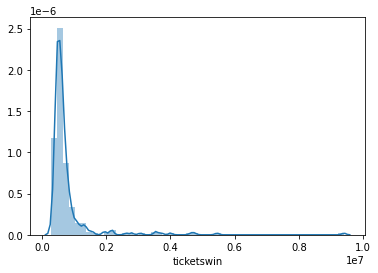

In [150]:
%matplotlib inline  
import seaborn as sns
sns.distplot(y_train)

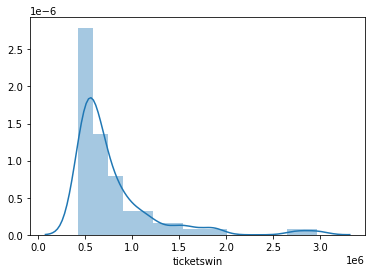

In [151]:
sns.distplot(y_val)

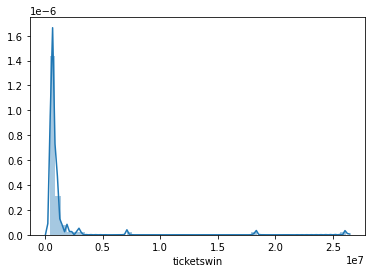

In [152]:
sns.distplot(y_test)

In [153]:
X_val['tickets'].describe()

count    7.900000e+01
mean     1.970535e+07
std      1.155023e+07
min      1.104527e+07
25%      1.324622e+07
50%      1.568545e+07
75%      2.122545e+07
max      7.495275e+07
Name: tickets, dtype: float64

In [154]:
X_train['tickets'].describe()

count    3.150000e+02
mean     1.936957e+07
std      1.979829e+07
min      7.569646e+06
25%      1.229948e+07
50%      1.454938e+07
75%      1.830888e+07
max      2.288416e+08
Name: tickets, dtype: float64

In [155]:
X_test['tickets'].describe()

count    9.900000e+01
mean     3.195926e+07
std      7.670614e+07
min      1.041271e+07
25%      1.385377e+07
50%      1.642494e+07
75%      2.313144e+07
max      6.351031e+08
Name: tickets, dtype: float64

In [156]:
plt.rcParams['figure.dpi'] = 72


In [157]:
! pip install pdpbox

In [158]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

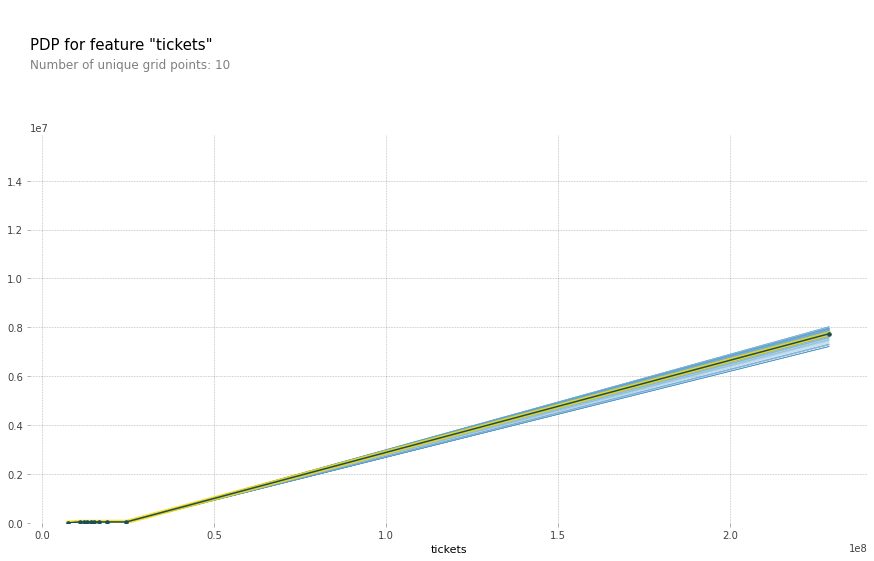

In [159]:
feature = 'tickets'

isolated = pdp_isolate(
    model = reg,
    dataset = X_train,
    model_features=X_train.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature,plot_lines=True);

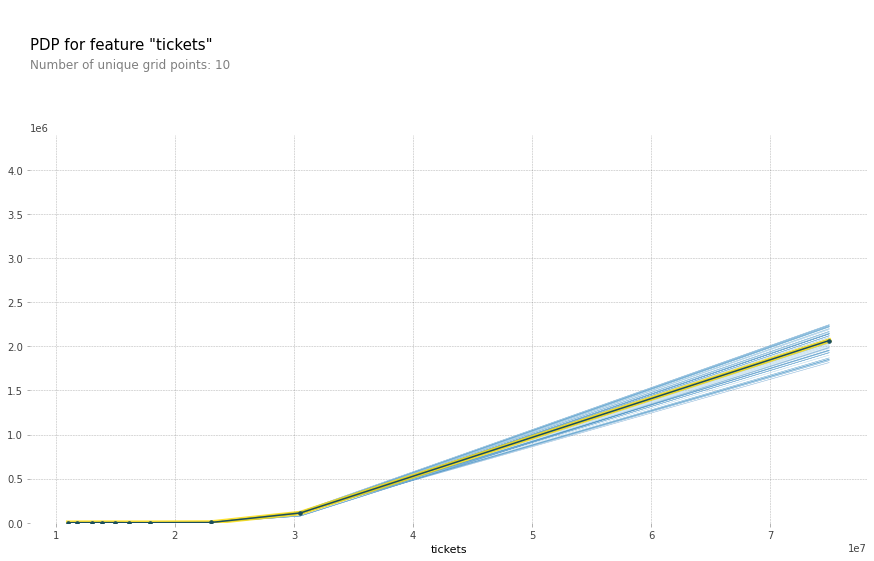

In [160]:
feature = 'tickets'

isolated = pdp_isolate(
    model = reg,
    dataset = X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature,plot_lines=True);

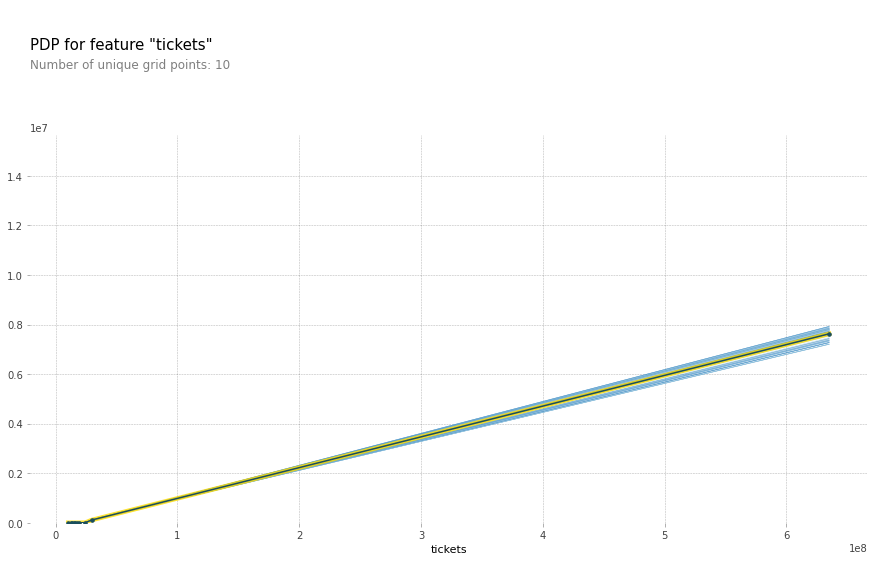

In [161]:
feature = 'tickets'

isolated = pdp_isolate(
    model = reg,
    dataset = X_test,
    model_features=X_test.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature,plot_lines=True);

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc6ce964240>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc6c0d0f6a0>})

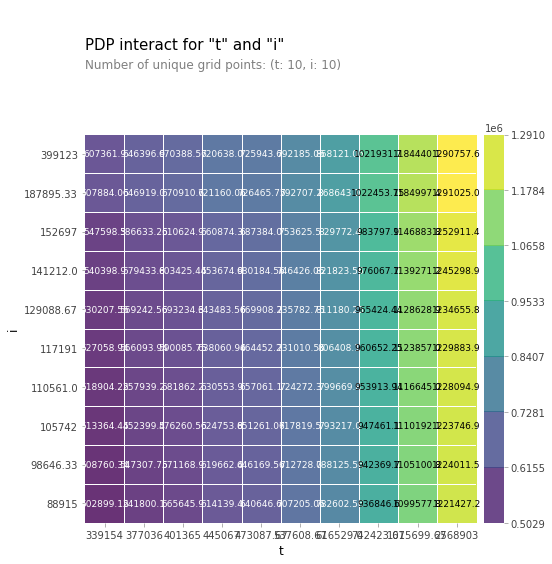

In [162]:
features = ['WinNoPP', 'WinPP']

interact = pdp_interact(
    model = reg,
    dataset = X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=feature)